In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.model_selection import train_test_split

In [2]:
wt = pd.read_csv('./datasets/globalterrorismdb_0617dist.csv', low_memory=False)

In [3]:
# Needed to use low_memory=False because the read_csv was initially casting mixed
# data types in rows.  After some research I learned that this would solve the 
# problem.

In [4]:
wt.head(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN


In [5]:
wt.shape

(170350, 135)

In [6]:
wt.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.703500e+05,170350.000000,170350.000000,170350.000000,170350.000000,170350.000000,170350.000000,165744.000000,165744.000000,170346.000000,...,1.279000e+03,4.960000e+02,7.070000e+02,487.000000,9911.000000,9322.000000,170350.000000,170350.000000,170350.000000,170350.000000
mean,2.001776e+11,2001.709997,6.474365,15.466845,0.043634,132.526669,7.091441,23.399774,26.350909,1.454428,...,3.224502e+06,4.519918e+05,3.849663e+05,272.462012,4.624458,-28.717335,-4.583387,-4.510555,0.091083,-3.975128
std,1.314444e+09,13.144146,3.392364,8.817929,0.204279,112.848161,2.949206,18.844885,58.570068,1.009005,...,3.090625e+07,6.070186e+06,2.435027e+06,3130.068208,2.041008,58.737198,4.542694,4.630440,0.583166,4.691492
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-176.176447,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.990053e+11,1990.000000,4.000000,8.000000,0.000000,75.000000,5.000000,11.263580,2.396199,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.007121e+11,2007.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.472680,43.130000,1.000000,...,1.420000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014023e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.744167,68.451297,1.000000,...,4.000000e+05,0.000000e+00,7.356800e+02,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017013e+11,2016.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,179.366667,5.000000,...,1.000000e+09,1.320000e+08,4.100000e+07,48000.000000,7.000000,1201.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
wt['country_txt'].value_counts()

Iraq                              22130
Pakistan                          13634
Afghanistan                       11306
India                             10978
Colombia                           8163
Philippines                        6212
Peru                               6088
El Salvador                        5320
United Kingdom                     5098
Turkey                             4106
Thailand                           3668
Somalia                            3482
Nigeria                            3418
Spain                              3245
Yemen                              3109
Sri Lanka                          2981
United States                      2758
Algeria                            2729
France                             2642
Lebanon                            2454
Chile                              2351
Egypt                              2165
Russia                             2158
West Bank and Gaza Strip           2144
Israel                             2133


In [8]:
wt['iyear'].value_counts()

2014    16860
2015    14852
2016    13488
2013    11996
2012     8500
1992     5073
2011     5071
2010     4822
2008     4803
2009     4719
1991     4683
1989     4323
1990     3887
1988     3720
1984     3495
1994     3458
2007     3241
1997     3200
1987     3184
1995     3081
1996     3056
1985     2915
1983     2870
1986     2860
2006     2749
1980     2662
1979     2661
1981     2585
1982     2545
2005     2009
2001     1907
2000     1813
1978     1526
1999     1395
2002     1332
1977     1319
2003     1262
2004     1162
1998      933
1976      923
1975      740
1970      651
1974      580
1972      496
1973      473
1971      470
Name: iyear, dtype: int64

# Let's see if we can create a solid model and get good predictions just looking at attacks in the United States :

In [9]:
wt_us = wt[wt['country_txt'] == 'United States']

In [10]:
wt_us.shape

(2758, 135)

In [11]:
wt_us.head(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN


In [12]:
wt_us.isnull().sum()

eventid                  0
iyear                    0
imonth                   0
iday                     0
approxdate            2721
extended                 0
resolution            2746
country                  0
country_txt              0
region                   0
region_txt               0
provstate                0
city                     0
latitude                 1
longitude                1
specificity              0
vicinity                 0
location              1852
summary               1054
crit1                    0
crit2                    0
crit3                    0
doubtterr                0
alternative           2364
alternative_txt       2364
multiple                 0
success                  0
suicide                  0
attacktype1              0
attacktype1_txt          0
                      ... 
propextent            1191
propextent_txt        1191
propvalue             1840
propcomment           1748
ishostkid              176
nhostkid              2696
n

# Target variable will be "gname", which as the data dictionary calls it is the primary "Perpetrator" of the attack.

# So given all of the parameters of a future terrorist attack, can we predict who carried out the attack?

# I will try to check correlation as I look at the feature variables.

In [13]:
y = wt_us['gname']

In [37]:
# LIST OF FEATURE VARIABLES TO USE:
#
# iyear
# country_txt
# extended
# crit1
# crit2
# crit3
# multiple
# provstate
# city
# vicinity
# latitude
# longitude
# attacktype1
# attacktype1_txt
# success
# suicide
# weaptype1
# weaptype1_txt
# weapsubtype1
# targtype1
# tarsubtype1
# natlty1
# corp1
# target1
#
# nkill
# nkillus
# nwound
# nwoundus
# property
# propextent
# ishostkid
# nhostkid
# ishostkidus
# nhostkidus
# ransom
# ransomamt
# ransomus
# ransomamtus
# ransompaid
# ransompaidus
# hostkidoutcome


In [15]:
wt_us['iyear'].value_counts()

1970    468
1971    247
1975    149
1977    130
1976    105
1974     94
1978     87
1982     78
1981     73
1979     69
1980     67
1972     64
1984     63
2016     61
1995     60
1973     58
1994     56
1999     53
1986     49
1983     44
1989     42
2001     41
1985     40
1997     40
2015     39
1996     35
1987     34
2002     33
1990     32
2003     32
2000     32
1992     32
1991     30
1998     30
1988     27
2014     26
2013     20
2005     20
2012     19
2008     18
2010     17
2009     10
2011     10
2004      9
2007      9
2006      6
Name: iyear, dtype: int64

In [16]:
wt_us['doubtterr'].value_counts()

 0    2220
 1     390
-9     148
Name: doubtterr, dtype: int64

In [17]:
wt_us['city'].value_counts(dropna=False)

New York City     449
San Juan          115
Los Angeles       109
San Francisco      98
Miami              85
Washington         84
Chicago            56
Seattle            39
Berkeley           33
Denver             22
San Diego          22
Portland           21
Oakland            20
Boston             18
San Jose           18
Kansas City        17
Rio Piedras        17
Houston            17
Sacramento         16
Albuquerque        16
Unknown            15
Detroit            15
Phoenix            14
Eugene             12
Atlanta            12
Carolina           12
Arlington          12
Cairo              12
Columbus           11
Palo Alto          11
                 ... 
Grand Forks         1
Corinth             1
Shakopee            1
Marlborough         1
Barnegat            1
Alhambra            1
Biggsville          1
Marina              1
Warrenville         1
Tomah               1
Burns               1
Pleasanton          1
West Covina         1
Vallejo             1
Mountain B

In [18]:
wt_us['attacktype1_txt'].value_counts(dropna=False)

Bombing/Explosion                      1378
Facility/Infrastructure Attack          838
Armed Assault                           249
Assassination                           128
Hostage Taking (Barricade Incident)      59
Unarmed Assault                          58
Hostage Taking (Kidnapping)              20
Hijacking                                17
Unknown                                  11
Name: attacktype1_txt, dtype: int64

In [19]:
wt_us['attacktype1'].value_counts(dropna=False)

3    1378
7     838
2     249
1     128
5      59
8      58
6      20
4      17
9      11
Name: attacktype1, dtype: int64

In [20]:
wt_us['success'].value_counts(dropna=False)

1    2274
0     484
Name: success, dtype: int64

In [21]:
wt_us['weaptype1_txt'].value_counts(dropna=False)

Explosives/Bombs/Dynamite                                                      1392
Incendiary                                                                      822
Firearms                                                                        373
Unknown                                                                          39
Melee                                                                            37
Biological                                                                       24
Chemical                                                                         21
Sabotage Equipment                                                               18
Other                                                                            17
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)       9
Fake Weapons                                                                      5
Radiological                                                                

In [22]:
wt_us['weaptype1'].value_counts(dropna=False)

6     1392
8      822
5      373
13      39
9       37
1       24
2       21
11      18
12      17
10       9
7        5
3        1
Name: weaptype1, dtype: int64

In [23]:
wt_us['weaptype2_txt'].value_counts(dropna=False)

NaN                                                                            2618
Firearms                                                                         49
Melee                                                                            20
Incendiary                                                                       19
Sabotage Equipment                                                               16
Explosives/Bombs/Dynamite                                                        14
Fake Weapons                                                                     11
Other                                                                             8
Chemical                                                                          2
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)       1
Name: weaptype2_txt, dtype: int64

In [24]:
wt_us['weaptype2'].value_counts(dropna=False)


NaN      2618
 5.0       49
 9.0       20
 8.0       19
 11.0      16
 6.0       14
 7.0       11
 12.0       8
 2.0        2
 10.0       1
Name: weaptype2, dtype: int64

In [25]:
wt_us['targtype1'].value_counts(dropna=False)


1     769
2     323
14    318
5     253
4     186
8     167
3     164
7     144
15    132
21     88
10     58
6      52
12     28
19     16
20     11
16     10
18      9
17      8
9       7
11      7
22      6
13      2
Name: targtype1, dtype: int64

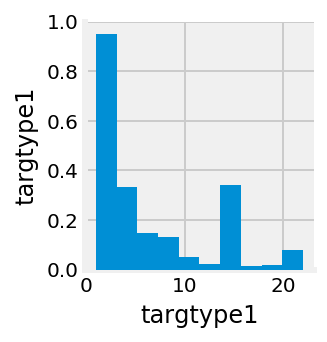

In [26]:
sns.pairplot(wt_us[['targtype1','gname']])

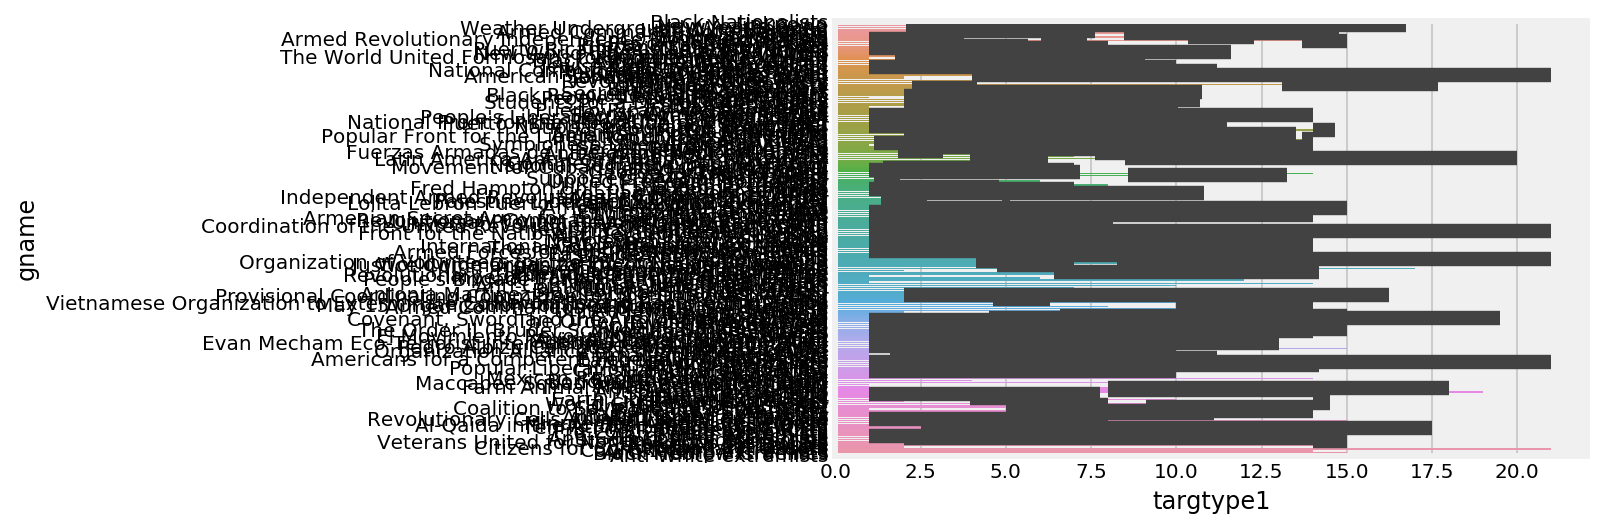

In [27]:
sns.barplot(x='targtype1', y='gname', data=wt_us)

# Woah!!!!  Need another way to see correlation to target.

In [28]:
wt_us['targsubtype1'].value_counts(dropna=False)

 40.0     239
 3.0      221
 21.0     198
 7.0      188
 49.0     131
NaN       120
 86.0     101
 28.0      83
 5.0       75
 27.0      71
 25.0      66
 71.0      65
 46.0      63
 22.0      60
 107.0     59
 4.0       58
 11.0      49
 76.0      47
 14.0      44
 53.0      41
 45.0      37
 2.0       37
 15.0      35
 23.0      34
 67.0      31
 68.0      31
 18.0      31
 44.0      26
 8.0       25
 82.0      24
         ... 
 55.0       8
 100.0      8
 93.0       7
 52.0       7
 58.0       5
 70.0       5
 90.0       5
 95.0       5
 101.0      4
 88.0       4
 110.0      3
 109.0      3
 31.0       3
 13.0       3
 29.0       3
 26.0       3
 75.0       2
 32.0       2
 62.0       2
 64.0       2
 99.0       2
 83.0       2
 97.0       2
 98.0       2
 74.0       2
 106.0      2
 20.0       2
 94.0       1
 102.0      1
 57.0       1
Name: targsubtype1, Length: 86, dtype: int64

In [29]:
wt_us['natlty1'].value_counts(dropna=False)

 217.0    2397
 163.0      71
 359.0      47
 51.0       24
 209.0      15
 130.0      13
 235.0      11
 422.0      11
 183.0      11
 94.0       11
 97.0       10
NaN          9
 60.0        9
 87.0        9
 223.0       9
 222.0       8
 185.0       6
 95.0        5
 155.0       5
 58.0        5
 92.0        5
 199.0       5
 44.0        4
 110.0       4
 162.0       4
 216.0       3
 50.0        3
 113.0       3
 145.0       2
 17.0        2
          ... 
 173.0       2
 49.0        2
 45.0        2
 69.0        2
 167.0       2
 99.0        1
 999.0       1
 75.0        1
 11.0        1
 30.0        1
 43.0        1
 120.0       1
 144.0       1
 102.0       1
 229.0       1
 236.0       1
 208.0       1
 161.0       1
 8.0         1
 112.0       1
 38.0        1
 160.0       1
 184.0       1
 96.0        1
 19.0        1
 156.0       1
 201.0       1
 403.0       1
 218.0       1
 362.0       1
Name: natlty1, Length: 61, dtype: int64

In [30]:
wt_us['corp1'].value_counts()

Planned Parenthood                                                      53
Bank of America                                                         40
Selective Service                                                       33
Civilians                                                               27
Unknown                                                                 25
Not Applicable                                                          22
white people in San Francisco                                           20
R.O.T.C.                                                                20
New York Police Department                                              14
National Guard Armory                                                   13
Planned Parenthood Federation of America, Inc.                           8
Wells Fargo Bank                                                         8
Physician who performed abortions                                        7
Department Store         

In [31]:
wt_us['target1'].value_counts()

Clinic                                                                                                                                        29
Church                                                                                                                                        27
bank                                                                                                                                          21
Civilians in the United States Midwest                                                                                                        18
department store                                                                                                                              16
Mosque                                                                                                                                        15
Bank of America                                                                                                                   

# SURPRISE :
### The World Terrorism Dataset did not come with a data dictionary, so I searched the web and found a great PDF data dictionary with descriptions of all variables.

### Even more surprising was the discovery of another dataset that adds more data behind the ideology/motive of all of the terrorist attacks that occured in the US.  This dataset is fairly new (2 years old) and has only been downloaded a few hundred times, so maybe I'll be doing research that hasn't been done very often.

### This new dataset has the same ID numbers for each attack.  My plan is to merge them, but first I wanted to get a look at it.  

### The ID (eventid) is in scientific notation, so I will need to determine if the merge will be successful.  I'll try that after more data investigation. Here is that extra new dataset:

In [32]:
wt_usi = pd.read_table('./datasets/globalterrorismdb_USideology_1970-2016.tab')

In [33]:
wt_usi.head()


,eventid,ENVIRONMENTAL,LEFT-WING,RIGHT-WING,RIGHT-WING-SOVEREIGN,RIGHT-WING-ANTIGOV,RELIGIOUS,RELIGIOUS-CHRISTIAN,RELIGIOUS-JEWISH,RELIGIOUS-ISLAMIC,ISLAMIC-SHIA,ISLAMIC-SUNNI,NATIONALIST-SEPARATIST,SINGLE
0,1.970010e+11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.970010e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.970010e+11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.970010e+11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.970011e+11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
wt_usi.shape


(2794, 14)

In [35]:
wt_usi.isnull().sum()


eventid                     0
ENVIRONMENTAL             553
LEFT-WING                 553
RIGHT-WING                553
RIGHT-WING-SOVEREIGN      553
RIGHT-WING-ANTIGOV        553
RELIGIOUS                 553
RELIGIOUS-CHRISTIAN       553
RELIGIOUS-JEWISH          553
RELIGIOUS-ISLAMIC         553
ISLAMIC-SHIA              553
ISLAMIC-SUNNI             553
NATIONALIST-SEPARATIST    553
SINGLE                    553
dtype: int64

# NOTE - I still have to do a merge of these 2 datasets, and then do more EDA on the combined data. I will update my progress after this weekend.